With the dramatic growth on the banking sector, banks have received unlimited applications for loans. Making decisions on eligible applicants to a loan plays a key role in banking process. In this project, I will use Logistic Regression Model and 10-fold cross validation to predict the factors that affect a bank's decision to grant a loan. 
Dataset link: https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_test = pd.read_csv("D:\\Project\\Loan Prediction\\test.csv")

In [3]:
data_train = pd.read_csv("D:\\Project\\Loan Prediction\\train.csv")

In [4]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
data_train.shape

(614, 13)

In [7]:
data_test.shape

(367, 12)

In [8]:
data_train['Loan_Status'].value_counts(normalize=True) # Explore dependent variable in training dataset

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

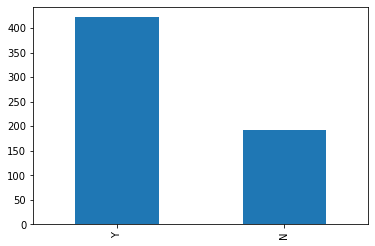

In [9]:
data_train['Loan_Status'].value_counts().plot.bar() # Visualize dependent variable in training dataset

The loan of 422 (around of 69%) people out of 614 was approved.

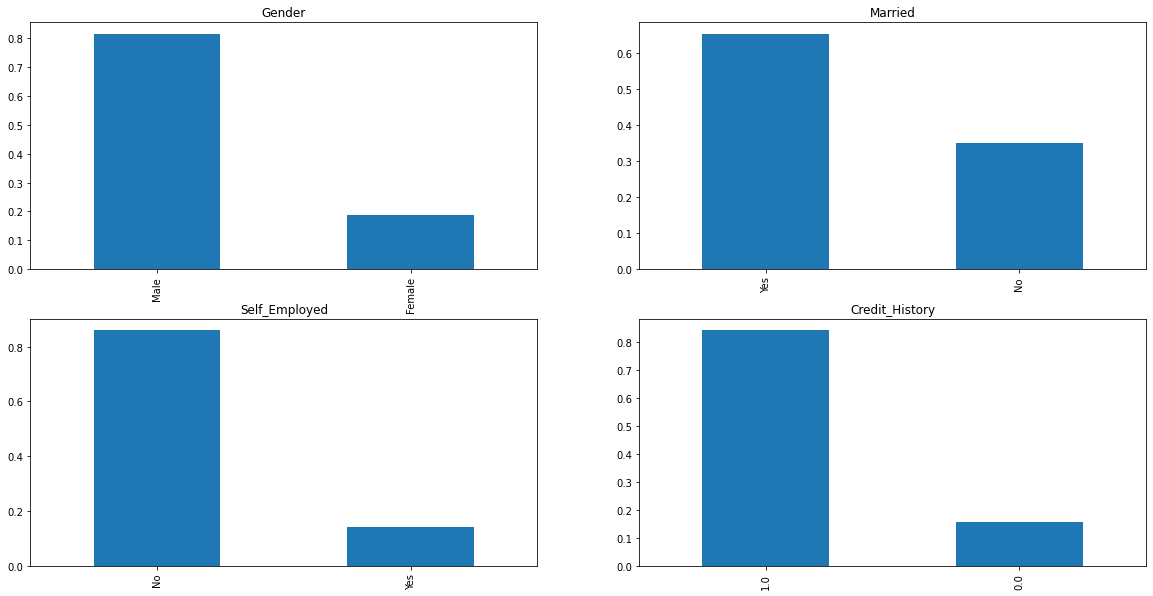

In [10]:
plt.figure(1) 
plt.subplot(221)
data_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title = 'Gender')
plt.subplot(222)
data_train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
data_train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
data_train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show() # Visualize catergorical independent variables

From the bar plots, we see:
* 80 percent of the applicants are Male
* More than 65 percent of the applicants are married
* More than 80 percent of the applicants are not self-employed
* Approximately 85 percent of the applicants have the credit history of repaying their debts.

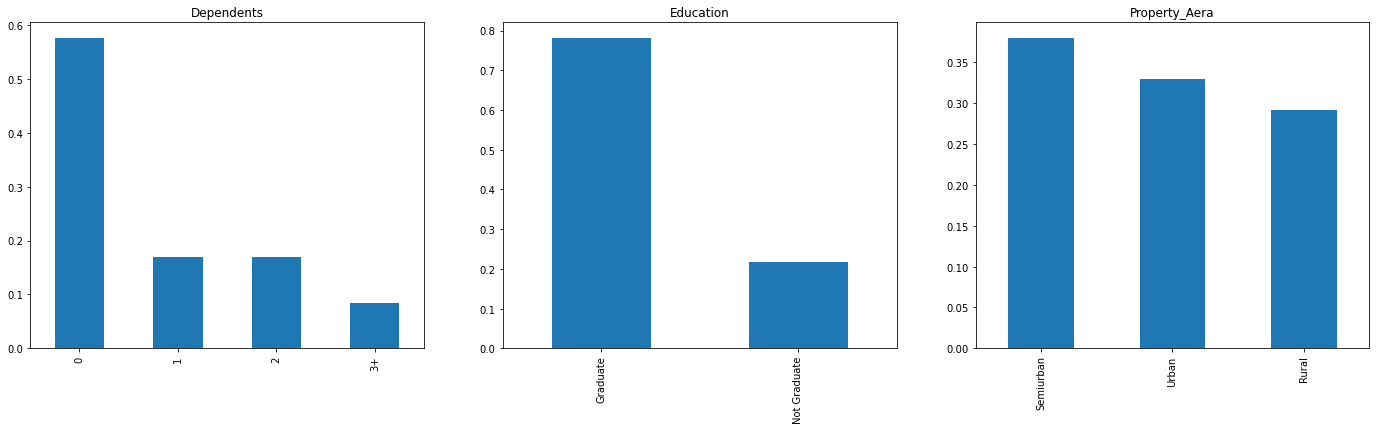

In [11]:
plt.figure(1)
plt.subplot(131)
data_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')
plt.subplot(132)
data_train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
data_train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Aera')
plt.show() # Visualize ordinal independent variables

From the bar plots, we see:
* Most of the applicants do not have any dependents.
* Around 80 percent of the applicants are Graduate.
* Most of the applicants live in Semiurban neigboorhood.

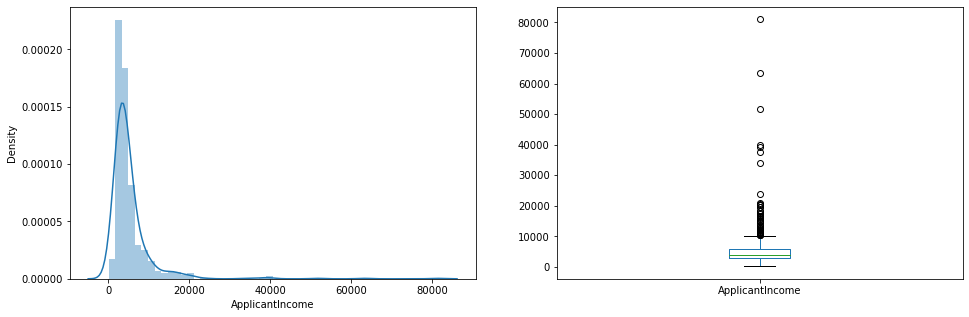

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data_train['ApplicantIncome'])
plt.subplot(122)
data_train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show() # Visualize the numerical indepdent variable - ApplicantIncome

From the plots, we see:
* Most of the data in the distribution of applicant income is toward left
* There are some outliers/extreme values in applicant income data, illustrating the differences in the social income.

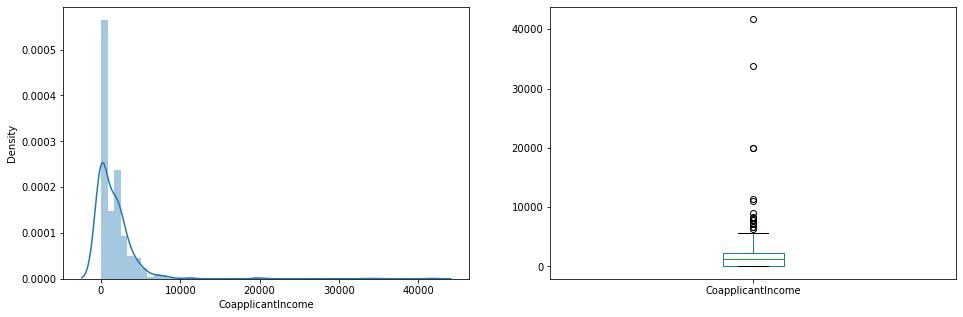

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data_train['CoapplicantIncome'])
plt.subplot(122)
data_train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

* Most of the data in the distribution of co-applicant income is toward left, the same distribution trend as applicant income's.
* There are some outliers/extreme values in co-applicant income data, illustrating the differences in the social income.


<AxesSubplot:>

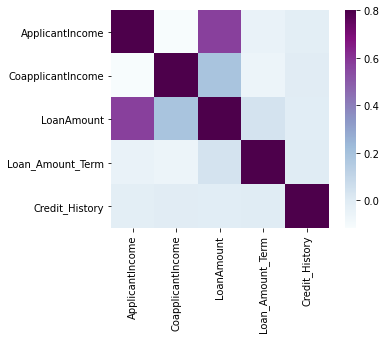

In [14]:
matrix = data_train.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu") # Visualize the correlation between variables.

The most correlated variables are Loan Amount and Applicant Income

In [15]:
data_train.isnull().sum() # Check if there are missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender(13), Married(3),Depedents(15),Self_Employed(32), LoanAmount(22), Loan_Amount_Term(14) and Credit_History(50)

In [16]:
# Imput missing values by mode in training dataset
data_train['Gender'].fillna(data_train['Gender'].mode()[0], inplace=True)
data_train['Married'].fillna(data_train['Married'].mode()[0], inplace=True)
data_train['Dependents'].fillna(data_train['Dependents'].mode()[0], inplace=True)
data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0], inplace=True)
data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0], inplace=True)
data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0], inplace=True)
data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(), inplace=True)

In [17]:
data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# Imput missing values by mode in testing dataset
data_test['Gender'].fillna(data_test['Gender'].mode()[0], inplace=True)
data_test['Married'].fillna(data_test['Married'].mode()[0], inplace=True)
data_test['Dependents'].fillna(data_test['Dependents'].mode()[0], inplace=True)
data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0], inplace=True)
data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0], inplace=True)
data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].mode()[0], inplace=True)
data_test['LoanAmount'].fillna(data_test['LoanAmount'].median(), inplace=True)

In [19]:
data_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

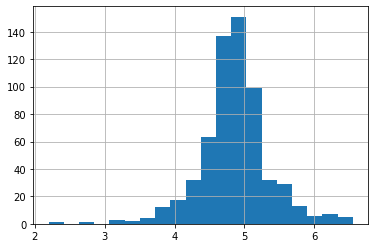

In [20]:
data_train['LoanAmount_log'] = np.log(data_train['LoanAmount']) # Log transformation to remove outliers in training dataset
data_train['LoanAmount_log'].hist(bins=20)
data_test['LoanAmount_log'] = np.log(data_test['LoanAmount']) # Log transformation to remove outliers in testing dataset

# Logistic Regression Model

In [21]:
data_train = data_train.drop('Loan_ID', axis= 1) # Drop the Loan_ID variable in the training dataset
data_test = data_test.drop('Loan_ID', axis= 1) # Drop the Loan_ID variable in the testing dataset

In [24]:
X = data_train.drop('Loan_Status', 1)
y = data_train.Loan_Status

In [25]:
X = pd.get_dummies(X)
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False,
                  fit_intercept = True, intercept_scaling = 1, max_iter = 100,
                  multi_class = 'ovr', n_jobs = 1, penalty = '12', random_state = 1,
                  solver = 'liblinear', tol = 0.0001, verbose = 0, warm_start = False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [36]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv) # Calculate the accurary of the model

0.8162162162162162

Our predictions are nearly 82% accurate

In [39]:
pred_test = model.predict(data_test) # Make predictions for the testing dataset

In [40]:
submission = pd.read_csv('D:\\Project\\Loan Prediction\\sample_submission_49d68Cx.csv')

In [43]:
submission['Loan_Status'] = pred_test

In [44]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [45]:
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

# K-fold cross validation

In [48]:
from sklearn.model_selection import StratifiedKFold

In [60]:
i = 1 
kf = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True) 
for train_index, test_index in kf.split(X,y):
    print
    ('\n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.iloc[train_index], X.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index] 
    model = LogisticRegression(random_state = 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accurary_score', score)
    i + 1 
    pred_test = model.predict(data_test)
    pred = model.predict_proba(xvl)[:,1]

accurary_score 0.7580645161290323
accurary_score 0.8387096774193549
accurary_score 0.8548387096774194
accurary_score 0.8064516129032258
accurary_score 0.8360655737704918
accurary_score 0.7213114754098361
accurary_score 0.7704918032786885
accurary_score 0.8032786885245902
accurary_score 0.7868852459016393
accurary_score 0.7540983606557377


The mean validation accurary for this model using 10-fold cross validation is around 0.80